In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
df = pd.read_csv('movies.csv')

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


# Checking for Missing Values

In [4]:
for col in df.columns:
    missing_count = df[col].isnull().sum()
    print(f'{col}: {missing_count} missing values')

name: 0 missing values
rating: 77 missing values
genre: 0 missing values
year: 0 missing values
released: 2 missing values
score: 3 missing values
votes: 3 missing values
director: 0 missing values
writer: 3 missing values
star: 1 missing values
country: 3 missing values
budget: 2171 missing values
gross: 189 missing values
company: 17 missing values
runtime: 4 missing values


### To Handle missing data for the ratings column I chose to change the missing values to 'Not Rated'. 
I looked into the differences between 'Unrated' and 'Not Rated'. Can be used interchangeably but 'Unrated' can have additional context related.

In [5]:
df['rating'].unique()

array(['R', 'PG', 'G', nan, 'Not Rated', 'NC-17', 'Approved', 'TV-PG',
       'PG-13', 'Unrated', 'X', 'TV-MA', 'TV-14'], dtype=object)

In [6]:
df['rating'].fillna('Not Rated', inplace=True)

### For Votes and Score since there are only 3 missing values each I am choosing to gather the average numeric value for their specific genre

In [7]:
df[df['score'].isnull()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7661,Love by Drowning,R,Drama,2020,"November 6, 2020 (United States)",NaN,NaN,Justin Kreinbrink,C.E. Poverman,Nicky Whelan,United States,1000000.0,NaN,Dow Jazz Films,121.0
7662,The Robinsons,Not Rated,Action,2020,"November 10, 2020 (United States)",NaN,NaN,Directors,Aleks Alifirenko Jr.,Billy Hartmann,United States,10000.0,NaN,NaN,90.0
7666,It's Just Us,Not Rated,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [8]:
df[df['genre'] == 'Drama']['score'].mean()

6.693667546174143

In [9]:
df[df['genre'] == 'Action']['score'].mean()

6.202816901408451

In [10]:
avg_drama_score = round(df[df['genre'] == 'Drama']['score'].mean(),1)
avg_action_score = round(df[df['genre'] == 'Action']['score'].mean(),1)

In [11]:
df['score'].fillna(avg_drama_score, inplace=True)
df['score'].fillna(avg_action_score, inplace=True)

In [12]:
df['score'].isnull().sum()

0

### Doing the same for votes

In [13]:
df[df['genre'] == 'Drama']['votes'].mean()

69803.54287598944

In [14]:
df[df['genre'] == 'Action']['votes'].mean()

140575.8145539906

In [15]:
avg_drama_votes = round(df[df['genre'] == 'Drama']['votes'].mean(),0)
avg_action_votes = round(df[df['genre'] == 'Action']['votes'].mean(),0)

In [16]:
df['votes'].fillna(avg_drama_score, inplace=True)
df['votes'].fillna(avg_action_score, inplace=True)

In [17]:
df['votes'].isnull().sum()

0

# Looking at the null value for 'star' to determine if I can delete value

In [18]:
df[df['star'].isnull()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
474,The Business of Show Business,Not Rated,History,1983,"February 15, 1983 (Canada)",8.3,79.0,Tom Logan,Tom Logan,NaN,Canada,323562.0,NaN,CTV,55.0


In [19]:
df[df['genre']=='History']

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
474,The Business of Show Business,Not Rated,History,1983,"February 15, 1983 (Canada)",8.3,79.0,Tom Logan,Tom Logan,NaN,Canada,323562.0,NaN,CTV,55.0


## With 'History' only being represented once I am choosing to delete the column since there are no other movies to compare these values to.

In [20]:
df = df.dropna(subset=['star'])

    or

In [21]:
df = df[df['genre'] != 'History']

In [22]:
df[df['star'].isnull()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime


In [23]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


## Cleaning up the remainder  in the votes column 

In [24]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [25]:
df['votes'] = df['votes'].astype('int64')

In [36]:
pd.options.display.float_format = '{:.2f}'.format
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.80,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000.00,2847246203.00,Twentieth Century Fox,162.00
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.40,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.00,2797501328.00,Marvel Studios,181.00
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.80,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.00,2201647264.00,Twentieth Century Fox,194.00
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.80,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.00,2069521700.00,Lucasfilm,138.00
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.40,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.00,2048359754.00,Marvel Studios,149.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,Not Rated,Drama,2020,"October 23, 2020 (United States)",3.10,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.00,NaN,NaN,90.00
7664,Dream Round,Not Rated,Comedy,2020,"February 7, 2020 (United States)",4.70,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.00
7665,Saving Mbango,Not Rated,Drama,2020,"April 27, 2020 (Cameroon)",5.70,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.00,NaN,Embi Productions,NaN
7666,It's Just Us,Not Rated,Drama,2020,"October 1, 2020 (United States)",6.70,6,James Randall,James Randall,Christina Roz,United States,15000.00,NaN,NaN,120.00


In [37]:
#  Drop any duplicates

df.drop_duplicates().head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.40,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.00,46998772.00,Warner Bros.,146.00
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.80,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.00,58853106.00,Columbia Pictures,104.00
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.70,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.00,538375067.00,Lucasfilm,124.00
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.70,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.00,83453539.00,Paramount Pictures,88.00
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.30,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.00,39846344.00,Orion Pictures,98.00
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.40,123000,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.00,39754601.00,Paramount Pictures,95.00
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.90,188000,John Landis,Dan Aykroyd,John Belushi,United States,27000000.00,115229890.00,Universal Pictures,133.00
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.20,330000,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.00,23402427.00,Chartoff-Winkler Productions,129.00
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.80,101000,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.00,108185706.00,Dovemead Films,127.00
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.00,10000,Walter Hill,Bill Bryden,David Carradine,United States,10000000.00,15795189.00,United Artists,100.00


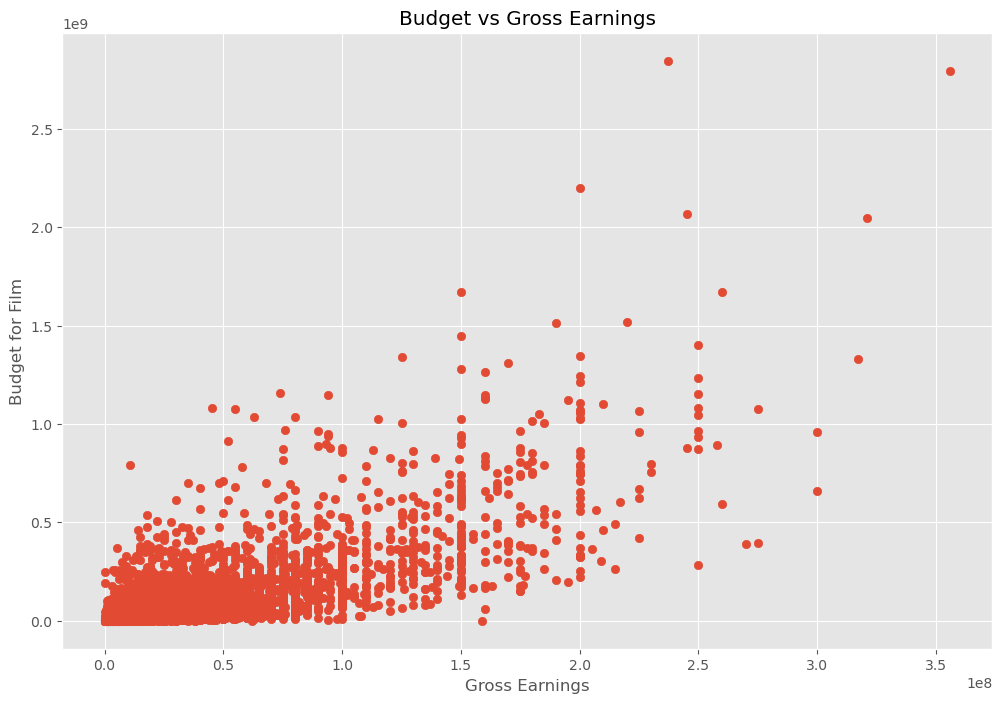

In [28]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

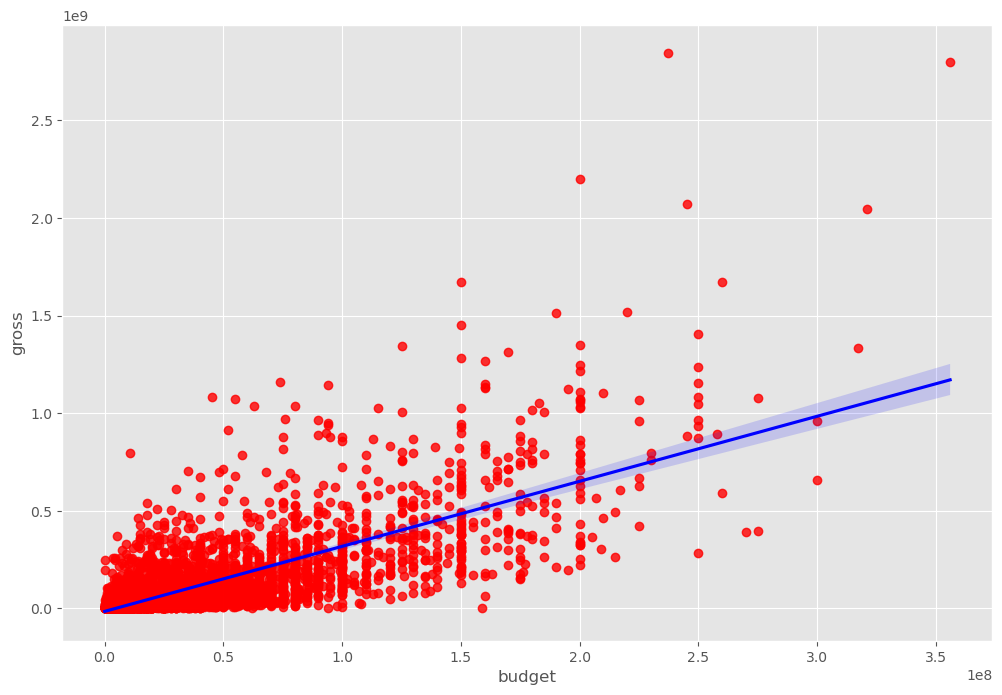

In [29]:
# Plot Budget vs Gross using Seaborn

sns.regplot(x='budget',y='gross',data=df, scatter_kws={'color':'red'}, line_kws={'color':'blue'})

## Beginning to look at correlation

In [30]:
numeric_df = df.select_dtypes(include=[np.number])

In [31]:
numeric_df

,year,score,votes,budget,gross,runtime
0,1980,8.4,927000,19000000.0,46998772.0,146.0
1,1980,5.8,65000,4500000.0,58853106.0,104.0
2,1980,8.7,1200000,18000000.0,538375067.0,124.0
3,1980,7.7,221000,3500000.0,83453539.0,88.0
4,1980,7.3,108000,6000000.0,39846344.0,98.0
...,...,...,...,...,...,...
7663,2020,3.1,18,7000.0,NaN,90.0
7664,2020,4.7,36,NaN,NaN,90.0
7665,2020,5.7,29,58750.0,NaN,NaN
7666,2020,6.7,6,15000.0,NaN,120.0


In [32]:
numeric_df.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.098595,0.222357,0.329164,0.257486,0.120319
score,0.098595,1.000000,0.409333,0.076424,0.186258,0.400446
votes,0.222357,0.409333,1.000000,0.442532,0.630757,0.309089
budget,0.329164,0.076424,0.442532,1.000000,0.740395,0.320265
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120319,0.400446,0.309089,0.320265,0.245216,1.000000


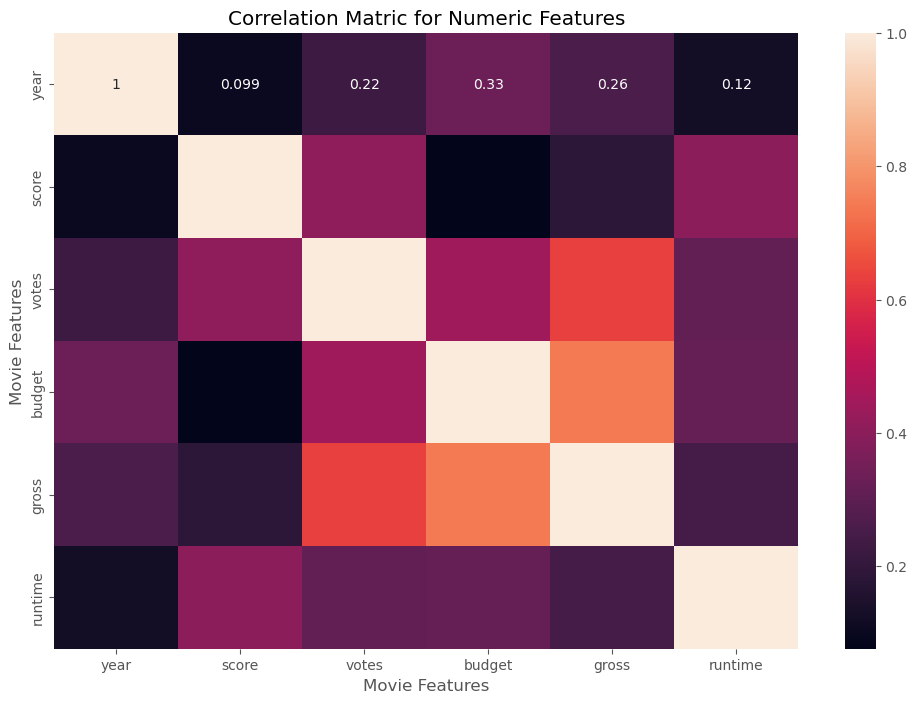

In [33]:
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [34]:
correlation_mat = numeric_df.corr()
corr_pairs = correlation_mat.unstack()
high_corr = corr_pairs[(corr_pairs) > 0.5]

In [35]:
high_corr

year     year       1.000000
score    score      1.000000
votes    votes      1.000000
         gross      0.630757
budget   budget     1.000000
         gross      0.740395
gross    votes      0.630757
         budget     0.740395
         gross      1.000000
runtime  runtime    1.000000
dtype: float64